In [12]:
import geopandas
import pandas
import osmnx as ox

from tqdm import tqdm

In [3]:
sample = geopandas.read_parquet("../../data/sample.parquet")

In [8]:
# Define which combination of OSM tags should be used. This covers what would be usually used in a morphological analysis.
type_filter = '["highway"~"unclassified"]'

unclassified = {}
# Loop over all samples
for ix, row in tqdm(sample.iterrows(), total=len(sample)):
    # Download OSM graph
    streets_graph = ox.graph_from_polygon(
        row.geometry,
        network_type="all_private",
        custom_filter=type_filter,
        retain_all=True,
    )
    # Project graph to the local UTM zone (in meters with a reletively small error)
    streets_graph = ox.projection.project_graph(streets_graph)
    # Create an undirected graph to avoid duplicated geometry and convert it to a GeoDataFrame
    gdf = ox.graph_to_gdfs(
        ox.get_undirected(streets_graph),
        nodes=False,
        edges=True,
        node_geometry=False,
        fill_edge_geometry=True,
    )
    # Ensure tags are a string and not different dtype (as list) so we can save it
    gdf.highway = gdf.highway.astype(str)
    unclassified[int(row.eFUA_ID)] = gdf[["highway", "geometry"]]

100%|██████████████████████████████████████| 131/131 [1:19:34<00:00, 36.45s/it]


In [11]:
lens = [len(df) for df in unclassified.values()]

<AxesSubplot: ylabel='Frequency'>

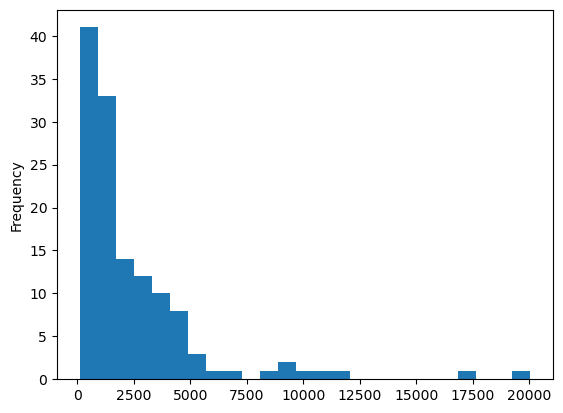

In [15]:
pandas.Series(lens).plot.hist(bins=25)

In [19]:
unclassified[8448].explore()

In [18]:
unclassified.keys()

dict_keys([9129, 7578, 4316, 5572, 8448, 8848, 8989, 9987, 7320, 10214, 1133, 7960, 2034, 8372, 826, 1872, 2352, 4497, 94, 9718, 3702, 7957, 8935, 6345, 5906, 2940, 947, 5320, 550, 2935, 5821, 2629, 6152, 1834, 3142, 2526, 3056, 1889, 433, 189, 3845, 3226, 7524, 6502, 581, 483, 1545, 809, 448, 98, 2327, 7390, 7406, 3611, 4617, 1459, 4215, 5593, 1477, 3340, 800, 7303, 2757, 6870, 6700, 5926, 3284, 6567, 4483, 6639, 2569, 1284, 7418, 358, 2072, 360, 789, 1266, 1830, 2355, 869, 3171, 790, 3222, 1064, 536, 5288, 1427, 1656, 6046, 955, 2203, 959, 4159, 2008, 4454, 4854, 2663, 4523, 687, 15, 310, 2262, 2086, 758, 3560, 308, 375, 4848, 1255, 4335, 594, 2162, 7068, 3343, 1301, 6192, 2204, 7020, 4143, 7032, 5543, 7165, 6790, 6487, 4881, 888, 6942, 3485, 5961, 3652])